<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook/lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio

## 나의 wav파일을 불러오기

In [2]:
fs, d = wavfile.read('mywav.wav')
print(f"sampling rate: {fs} Hz")
print(f"shape of data: {d.shape}")

if len(d.shape)==2:
    mywav = d[:,0]
elif len(d.shape)==1:
    mywav = d

L = len(d)
print(f"duration of data: {L/fs} s")
print(f"samples of data: {L} samples")


sampling rate: 8000 Hz
shape of data: (52000,)
duration of data: 6.5 s
samples of data: 52000 samples


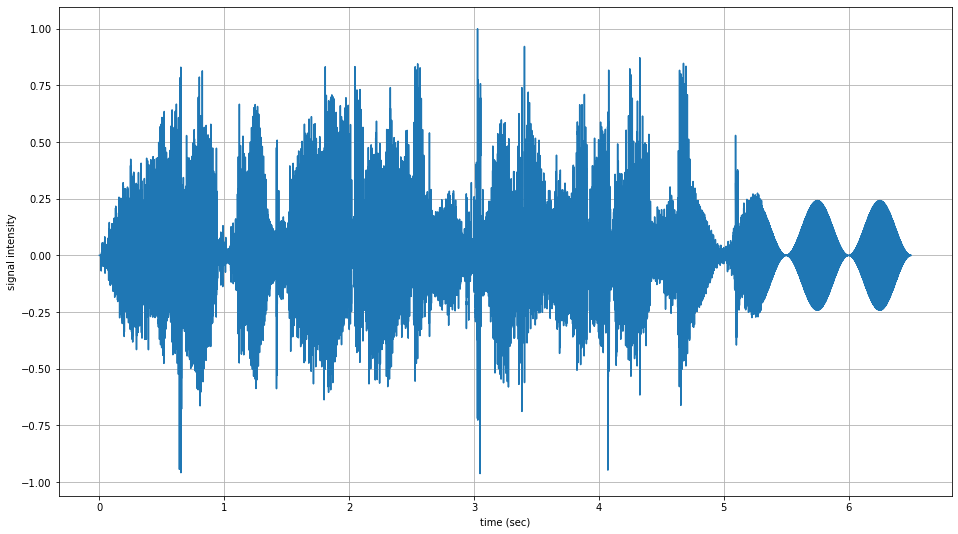

In [3]:
t = np.arange(0,len(mywav))/fs



plt.figure(figsize=(16,9))
plt.plot(t,mywav)
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.show()

In [4]:
Audio(mywav,rate=fs)


## Fourier Transform of mywav
- Spectrum을 살펴보고, 어떠한 주파수 주위에 에너지들이 많은 지를 확인합니다.

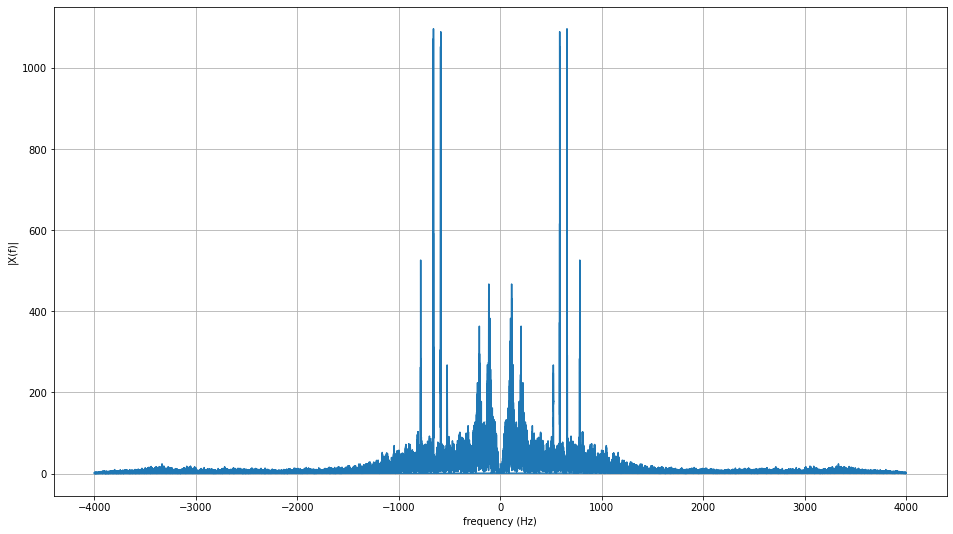

In [5]:
F = np.fft.fft(mywav)
freq = np.fft.fftfreq(len(t),1/fs)



plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(F))
plt.xlabel('frequency (Hz)')
plt.ylabel('|X(f)|')
plt.grid('on')
plt.show()

## Inverse Fourier Transform
- inverse Fourier transform의 결과로 원래의 신호가 복원되는 것을 확인합니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


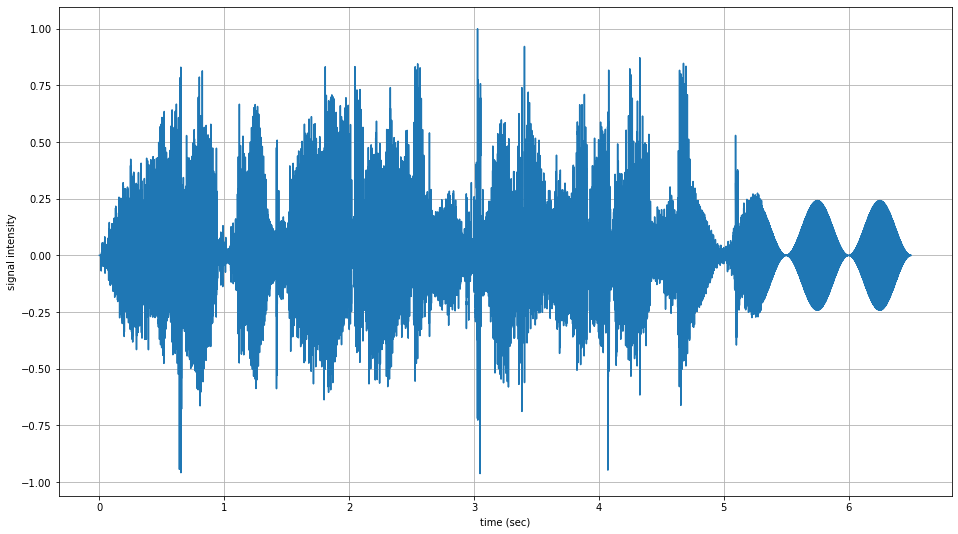

In [6]:
f = np.fft.ifft(F)



plt.figure(figsize=(16,9))
plt.plot(t,f)
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.show()
#Audio(f,rate=fs)


## Simple Lowpass Filter
- exponential decay function를 적당한 상수값 a를 정해 정의해봅시다.

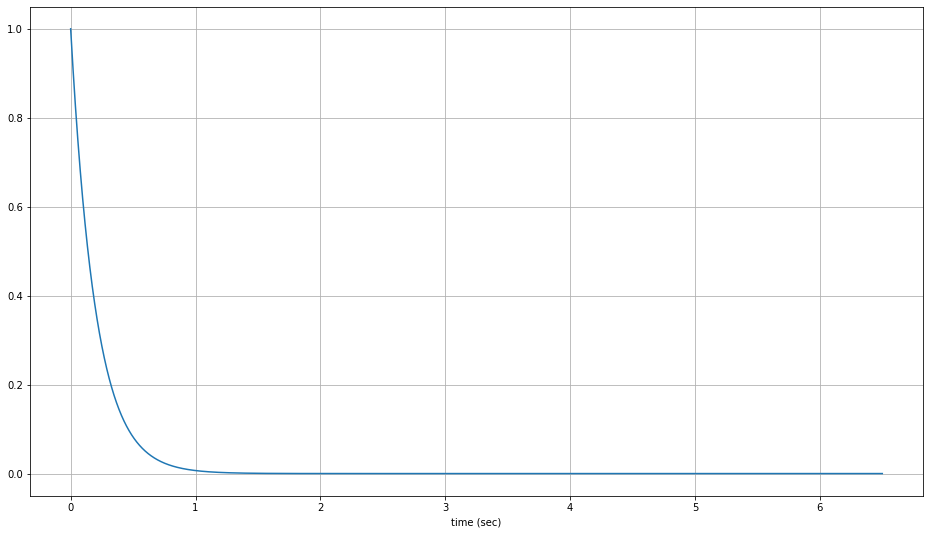

In [7]:
a = 5
h = np.exp(-t*a)



plt.figure(figsize=(16,9))
plt.plot(t,h)
plt.xlabel('time (sec)')
plt.grid('on')
plt.show()

- h의 Fourier transfrom H를 이용하여 low pass filtering을 진행해 봅시다.

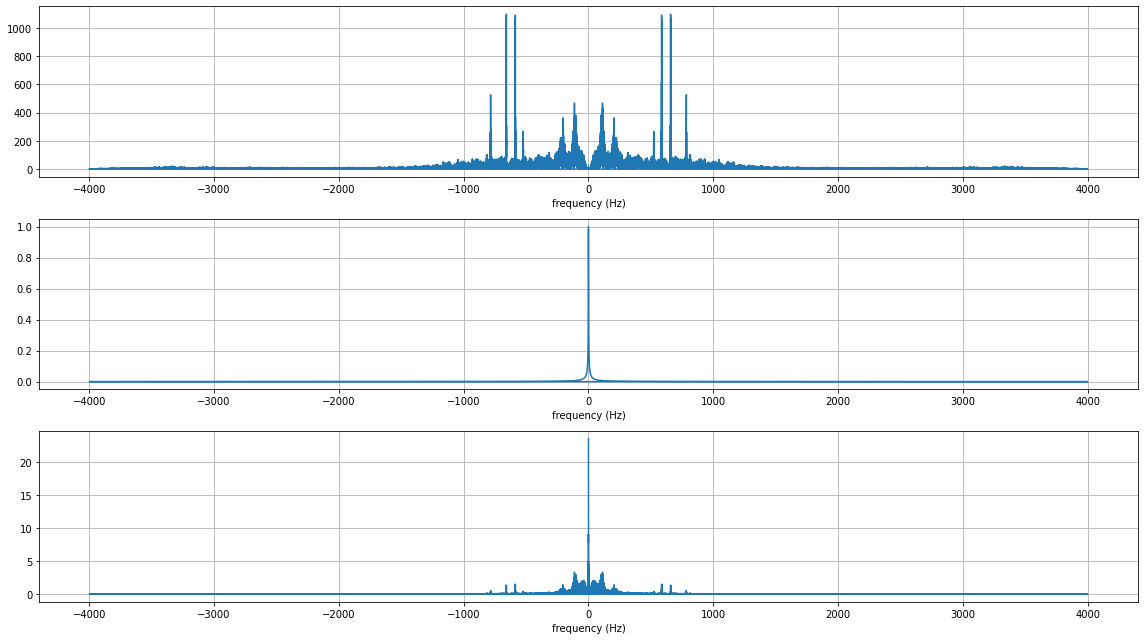

In [8]:
F = np.fft.fft(mywav)
H = np.fft.fft(h)
H = H/np.max(np.abs(H))
F2 = F*H
freq = np.fft.fftfreq(len(t),1/fs)



plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(freq,np.abs(F))
plt.xlabel('frequency (Hz)')
plt.grid('on')
plt.subplot(312)
plt.plot(freq,np.abs(H))
plt.xlabel('frequency (Hz)')
plt.grid('on')
plt.subplot(313)
plt.plot(freq,np.abs(F2))
plt.xlabel('frequency (Hz)')
plt.grid('on')
plt.tight_layout()
plt.show()

- inverse Fourier transform을 하여 filtering된 신호에 어떤 변화가 생겼는지 관찰합니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


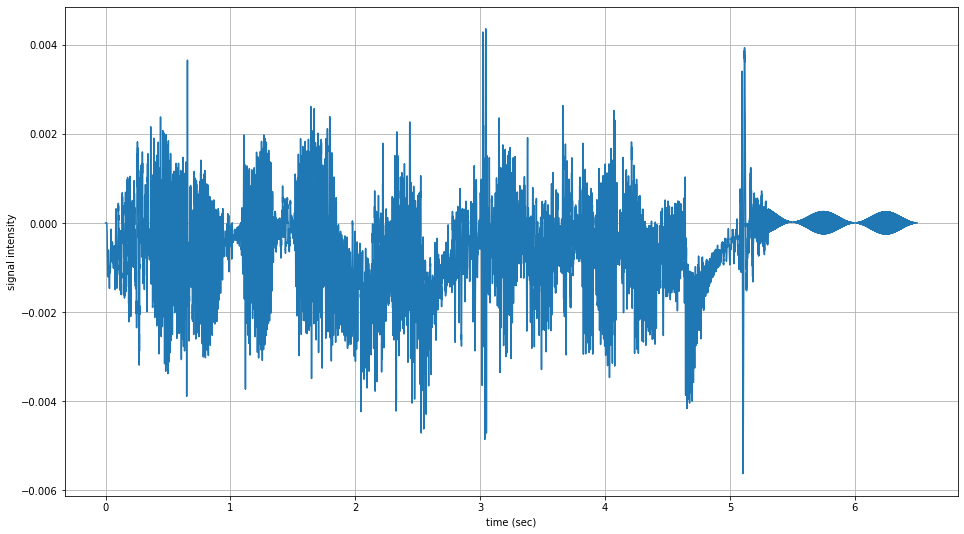

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [9]:
f2 = np.fft.ifft(F2)


plt.figure(figsize=(16,9))
plt.plot(t,f2)
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.show()
Audio(f2,rate=fs)

- time domain에서 convolution을 한 결과를 Fourier domain에서 multiplication을 진행한 결과와 비교해 봅니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


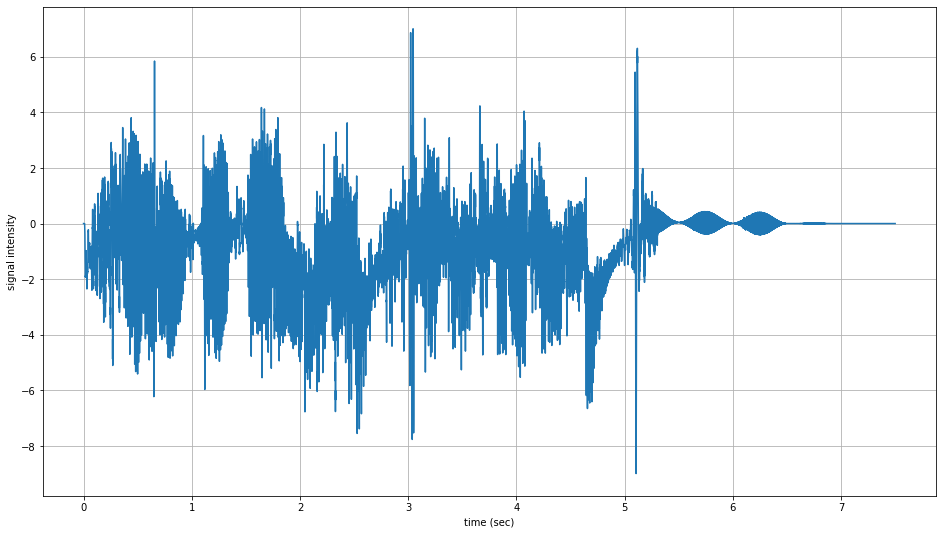

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [10]:
L = 8000
f3 = np.convolve(h[:L],f)
t3 = np.arange(0,len(f3))/fs

plt.figure(figsize=(16,9))
plt.plot(t3,f3)
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.show()
Audio(f3,rate=fs)

## Modulation
- 특정 주파수를 가지는 신호를 나의 신호에 곱했을 때 결과를 time domain과 frequency domain에서 각각 관찰해 봅니다.


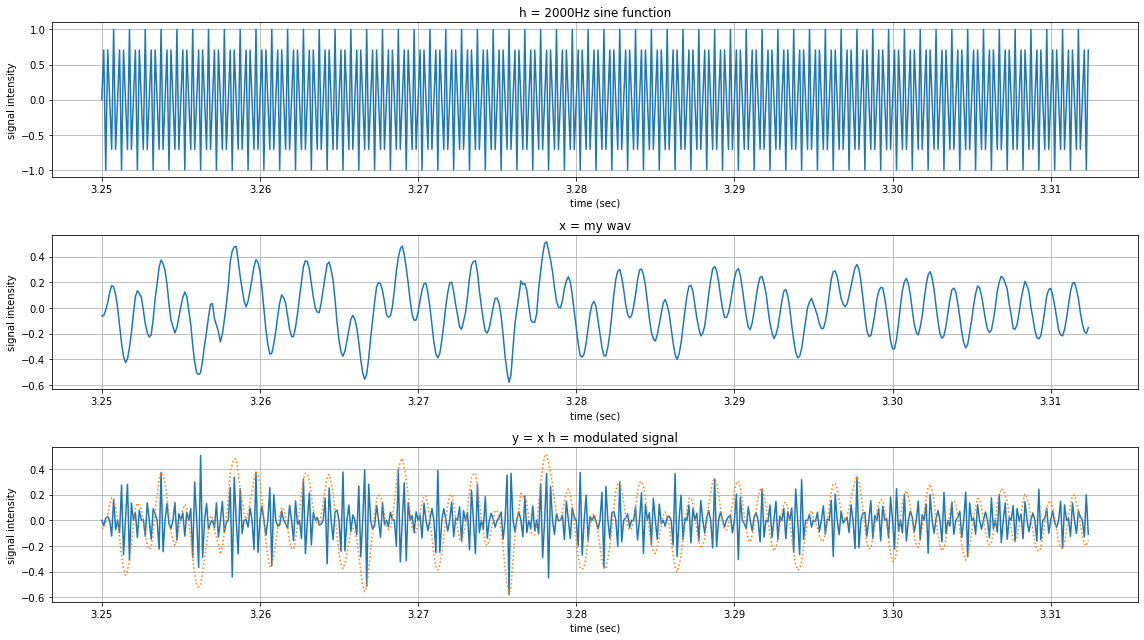

In [16]:
f0 = 3000
h = np.sin(2*np.pi*f0*t)
y = h*mywav
c0 = int(len(mywav)/2)

plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(t[c0:c0+500],h[c0:c0+500])
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.title('h = 2000Hz sine function')
plt.subplot(312)
plt.plot(t[c0:c0+500],mywav[c0:c0+500])
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.title('x = my wav')
plt.subplot(313)
plt.plot(t[c0:c0+500],y[c0:c0+500])
plt.plot(t[c0:c0+500],mywav[c0:c0+500],':')
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.title('y = x h = modulated signal')
plt.tight_layout()

plt.show()
Audio(y,rate=fs)

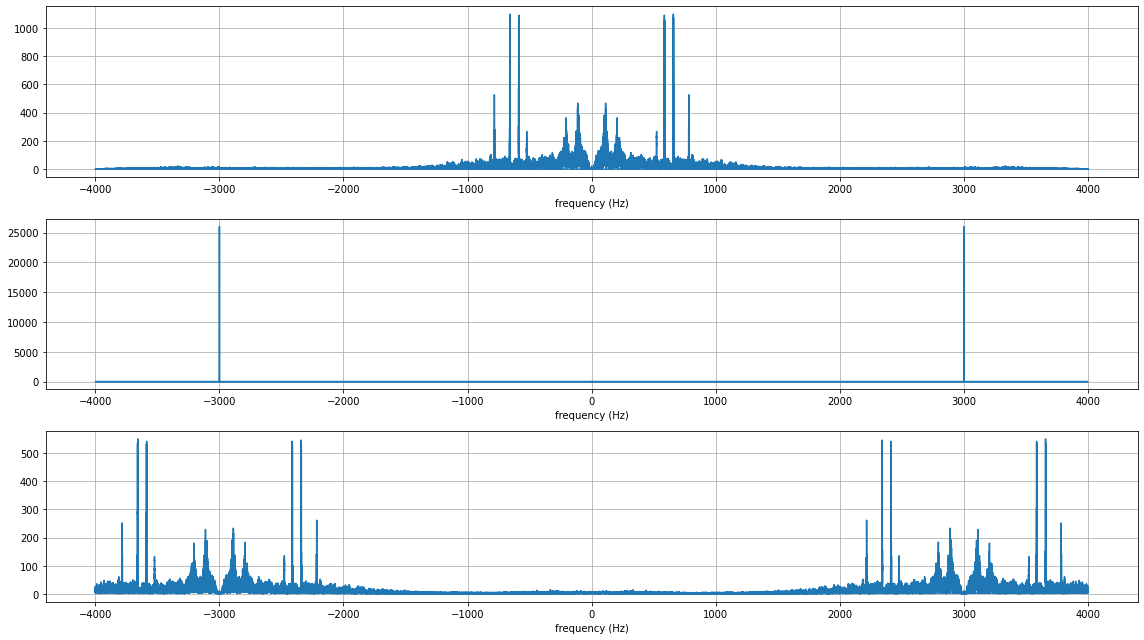

In [17]:
H = np.fft.fft(h)
X = np.fft.fft(mywav)
Y = np.fft.fft(y)

freq = np.fft.fftfreq(len(t),1/fs)

plt.figure(figsize=(16,9))

plt.subplot(311)
plt.plot(freq,np.abs(X))
plt.xlabel('frequency (Hz)')
#plt.axis([-4000,4000,-.2,1.05*np.max(np.abs(F))])
plt.grid('on')
plt.subplot(312)
plt.plot(freq,np.abs(H))
plt.xlabel('frequency (Hz)')
#plt.axis([-4000,4000,-.2,1.05*np.max(np.abs(F))])
plt.grid('on')
plt.subplot(313)
plt.plot(freq,np.abs(Y))
plt.xlabel('frequency (Hz)')
#plt.axis([-4000,4000,-.2,1.05*np.max(np.abs(F))])
plt.grid('on')
plt.tight_layout()
plt.show()


- y를 다시 원래의 신호로 복원하기 위해서는 어떤 과정이 필요할까요?